In [1]:
import json

from enum import Enum

import matplotlib.pyplot as plt
import numpy as np

from sympy.geometry import Segment, Line, Point

In [2]:
def load_polygon(json_filename):
    with open(json_filename) as f:
        return [Segment(p1, p2) for p1, p2 in json.load(f)]


POINT = Point(8, 4)
POLYGON = load_polygon('polygon.json')

In [3]:
class PointLocation(Enum):
    IN = 0
    OUT = 1
    ON = 2


def is_point_in_polygon(point, polygon):
    finished = False
    slope_delta = 1e-6
    slope = 0
    
    while not finished:
        line = Line(point, slope=slope)
        left_intersections = []
        
        slope += slope_delta
        finished = True
        
        for segment in polygon:
            intersections = segment.intersection(line)

            if intersections:
                intersection = intersections[0]

                if intersection == point:
                    return PointLocation.ON, line, left_intersections

                if intersection == segment.p1 or intersection == segment.p2:
                    finished = False
                    break

                if intersection.x < point.x:
                    left_intersections.append(intersection)

    return PointLocation.IN if len(left_intersections) % 2 == 1 else PointLocation.OUT, line, left_intersections

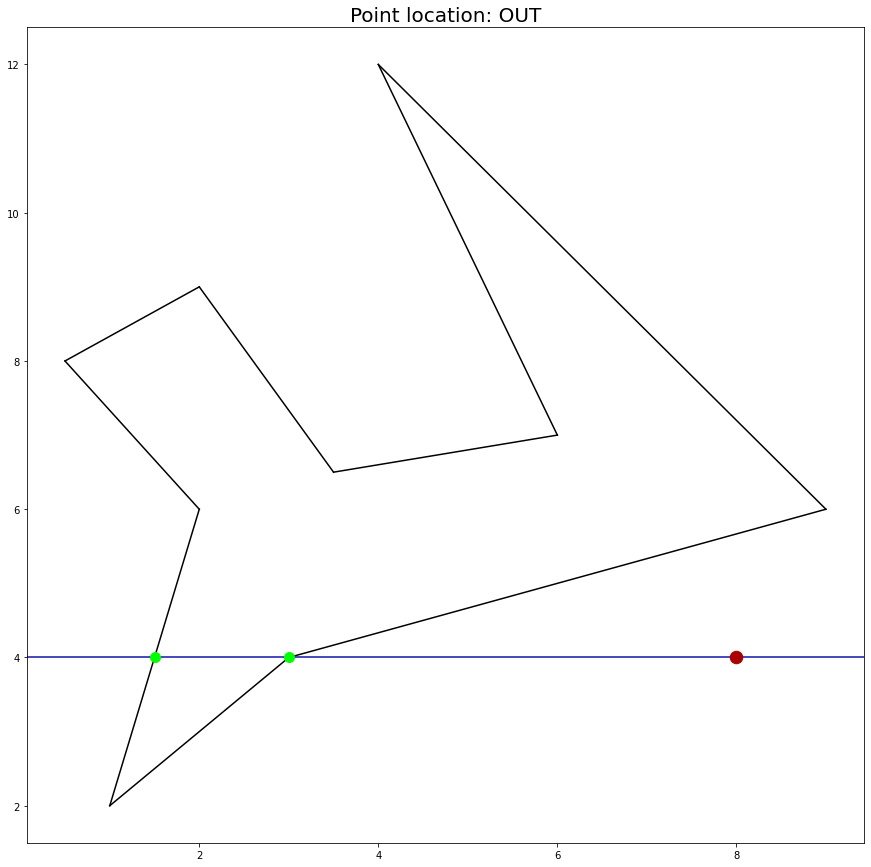

In [4]:
def plot_result(point, polygon):
    point_location, line, intersections = is_point_in_polygon(point, polygon)
    
    plt.figure(figsize=(15, 15))
    
    plt.title(f'Point location: {point_location.name}', fontsize=20)
    
    for segment in polygon:
        plt.plot((segment.p1.x, segment.p2.x), (segment.p1.y, segment.p2.y), color='#000000')
    
    plt.axline(np.array(line.p1, dtype=np.float32), np.array(line.p2, dtype=np.float32), color='#1010aa')
    
    for intersection in intersections:
        plt.plot(intersection.x, intersection.y, marker='.', markersize=20, color='#00ff00')
    
    plt.plot(point.x, point.y, marker='.', markersize=25, color='#aa0000')
        
    plt.show()
    

plot_result(POINT, POLYGON)